#   Single System
#Here is an example of a code cell that defines two vectors, ket0 and ket1 , corresponding to the qubit state vectors 
∣
0
⟩
∣0⟩ and 
∣
1
⟩
,
∣1⟩, and displays their average.

In [203]:
from numpy import array

ket0 = array([1, 0])
ket1 = array([0, 1])

display(ket0 / 2 + ket1 / 2)

array([0.5, 0.5])

It is not actually necessary to explicitly use the display command to see the result of this computation. We may instead simply write the expression of interest as the last line of the code cell, and it will be returned as its output:

In [204]:
ket0 / 2 + ket1 / 2

array([0.5, 0.5])

his code cell also illustrates that running code cells sequentially on a given page of this textbook has a cumulative effect, so it is not necessary to reload the array class or define ket0 and ket1 again. Reloading the page or switching to another page will, however, reset everything to its initial state.

As a general guideline, code cells within each subsection of this course are intended to be run sequentially. So, if running a code cell generates an error, be sure to first run all previous code cells within the subsection in which that code cell appears.

We can also use array to create matrices that represent operations.

In [205]:
M1 = array([[1, 1], [0, 0]])
M2 = array([[1, 1], [1, 0]])

M1 / 2 + M2 / 2

array([[1. , 1. ],
       [0.5, 0. ]])

Matrix multiplication (including matrix-vector multiplication as a special case) can be performed using the matmul function from NumPy :

In [206]:
from numpy import matmul

display(matmul(M1, ket1))
display(matmul(M1, M2))
display(matmul(M2, M1))

array([1, 0])

array([[2, 1],
       [0, 0]])

array([[1, 1],
       [1, 1]])

States, measurements, and operations
Qiskit includes several classes that allow for states, measurements, and operations to be easily created and manipulated — so starting from scratch and programming everything that is needed to simulate quantum states, measurements, and operations in Python is not required. Some examples to get started are included below.

Defining and displaying state vectors
Qiskit's Statevector class provides functionality for defining and manipulating quantum state vectors. The following code cell imports the Statevector class and defines a few vectors using it. (Note that we need the sqrt function from the NumPy library to compute the square roots for the vector u .)

In [207]:
from qiskit.quantum_info import Statevector
from numpy import sqrt

u = Statevector([1 / sqrt(2), 1 / sqrt(2)])
v = Statevector([(1 + 2.0j) / 3, -2 / 3])
w = Statevector([1 / 3, 2 / 3])

print("State vectors u, v, and w have been defined.")

State vectors u, v, and w have been defined.


The Statevector class provides a drawCopy to clipboard method for displaying state vectors, including latex and text options for different visualizations, as this code cell demonstrates:

In [208]:
display(u.draw("latex"))
display(v.draw("text"))

<IPython.core.display.Latex object>

[ 0.33333333+0.66666667j,-0.66666667+0.j        ]

The Statevector class also includes the is_valid method, which checks to see if a given vector is a valid quantum state vector (i.e., that it has Euclidean norm equal to 1):

In [209]:
display(u.is_valid())
display(w.is_valid())

True

False

Simulating measurements using Statevector
Next we will see one way that measurements of quantum states can be simulated in Qiskit, using the measure method from the Statevector class.

First, we create a qubit state vector v and then display it.

In [210]:
v = Statevector([(1 + 2.0j) / 3, -2 / 3])
v.draw("latex")

<IPython.core.display.Latex object>

Code cells can be modified — so go ahead and change the specification of the vector if you wish.

Next, running the measure method simulates a standard basis measurement. It returns the result of that measurement, plus the new quantum state of our system after that measurement.

In [211]:
v.measure()

(np.str_('0'),
 Statevector([0.4472136+0.89442719j, 0.       +0.j        ],
             dims=(2,)))

Measurement outcomes are probabilistic, so the same method can return different results. Try running the cell a few times to see this.

For the particular example of the vector v defined above, the measure method defines the quantum state vector after the measurement takes place to be

1
+
2
i
5
∣
0
⟩
5
​
 
1+2i
​
 ∣0⟩
(rather than 
∣
0
⟩
∣0⟩) or

−
∣
1
⟩
−∣1⟩
(rather than 
∣
1
⟩
∣1⟩), depending on the measurement outcome. In both cases the alternatives are, in fact, equivalent — they are said to differ by a global phase because one is equal to the other multiplied by a complex number on the unit circle. This issue is discussed in greater detail in Lesson 3, and can safely be ignored for now.

As an aside, Statevector will throw an error if the measure method is applied to an invalid quantum state vector. Feel free to give it a try if you're interested in seeing what an error looks like.

Statevector also comes with a sample_counts method that allows for the simulation of any number of measurements on the system. For example, the following cell shows the outcome of measuring the vector v 
1000
1000 times, which (with high probability) results in the outcome 
0
0 approximately 
5
5 out of every 
9
9 times (or about 
556
556 of the 
1000
1000 trials) and the the outcome 
1
1 approximately 
4
4 out of every 
9
9 times (or about 
444
444 out of the 
1000
1000 trials). The cell also demonstrates the plot_histogram function for visualizing the results.

{np.str_('0'): np.int64(559), np.str_('1'): np.int64(441)}

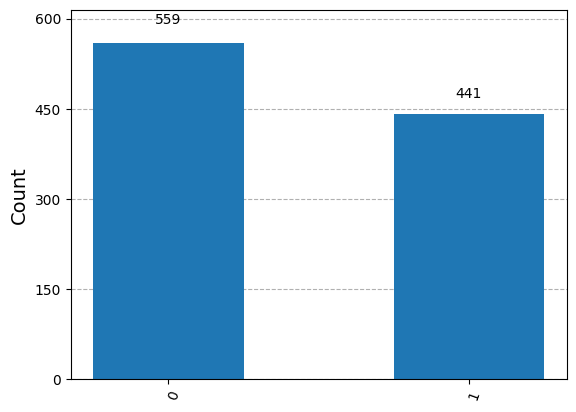

In [212]:
from qiskit.visualization import plot_histogram

statistics = v.sample_counts(1000)
display(statistics)
plot_histogram(statistics)

Running the cell multiple times and trying different numbers of samples in place of 
1000
1000 may be helpful for developing some intuition for how the number of trials influences the estimated probabilities.

Performing operations with Operator and Statevector
Unitary operations can be defined and performed on state vectors in Qiskit using the Operator class, as in the example that follows.

In [213]:
from qiskit.quantum_info import Operator

X = Operator([[0, 1], [1, 0]])
Y = Operator([[0, -1.0j], [1.0j, 0]])
Z = Operator([[1, 0], [0, -1]])
H = Operator([[1 / sqrt(2), 1 / sqrt(2)], [1 / sqrt(2), -1 / sqrt(2)]])
S = Operator([[1, 0], [0, 1.0j]])
T = Operator([[1, 0], [0, (1 + 1.0j) / sqrt(2)]])

v = Statevector([1, 0])

v = v.evolve(H)
v = v.evolve(T)
v = v.evolve(H)
v = v.evolve(T)
v = v.evolve(Z)

v.draw("text")

[ 0.85355339+0.35355339j,-0.35355339+0.14644661j]

Looking ahead toward quantum circuits
Quantum circuits won't be formally introduced until Lesson 3, but we can nevertheless experiment with composing qubit unitary operations using Qiskit's QuantumCircuit class. In particular, we may define a quantum circuit (which in this case will simply be a sequence of unitary operations performed on a single qubit) as follows.

In [214]:
from qiskit import QuantumCircuit

circuit = QuantumCircuit(1)

circuit.h(0)
circuit.t(0)
circuit.h(0)
circuit.t(0)
circuit.z(0)

circuit.draw()

┌───┐┌───┐┌───┐┌───┐┌───┐
q: ┤ H ├┤ T ├┤ H ├┤ T ├┤ Z ├
   └───┘└───┘└───┘└───┘└───┘

The operations are applied sequentially, starting on the left and ending on the right in the figure. Let us first initialize a starting quantum state vector and then evolve that state according to the sequence of operations.

In [215]:
ket0 = Statevector([1, 0])
v = ket0.evolve(circuit)
v.draw("text")

[ 0.85355339+0.35355339j,-0.35355339+0.14644661j]

Finally, let's simulate the result of running this experiment (i.e., preparing the state 
∣
0
⟩
,
∣0⟩, applying the sequence of operations represented by the circuit, and measuring) 4000 times.

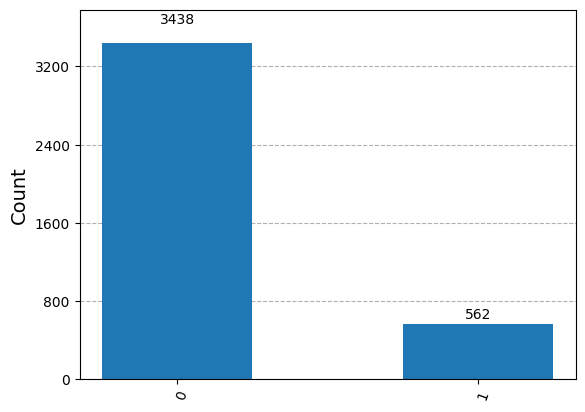

In [216]:
statistics = v.sample_counts(4000)
plot_histogram(statistics)